In [1]:
from matplotlib import pyplot as plt, style;import numpy as np;from math import exp, pi, sqrt, atan;import scipy as sp;
import sys
sys.path.append("..")
from PIDTuner import *;

In [2]:
from scipy import signal

#print(style.available)
style.use("seaborn-notebook")


In [3]:
kAmpsSet = 2.25
kVoltageInScale = 5./3.3
kControlSet = 3.3
kControlSetting = (kAmpsSet*kVoltageInScale)/3.3#amps/control volts
PhaseRange = (-150, -90)
fitpoints = 300
kUpdateRate = 150


# Notes
The bumptest was run at an output of +- 2.25A with an analog in divider of ~5V -> 3.3V. The analog output of 3.3V commands a 2.25A current.

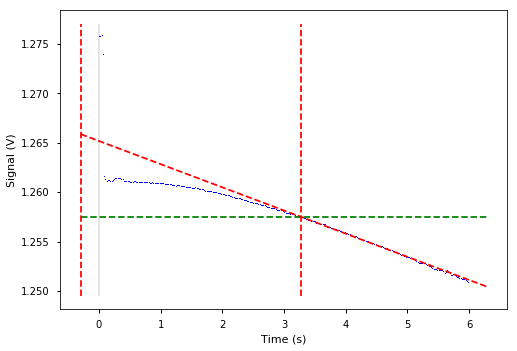

Delay:  3.2751458314335964 Slope:  -0.0023411759552310744
Phase Margin @ 0.01Hz: 61.5
Max Phase Margin: 61.6
Kp, Ti, Ki = -26.08, 52.4, -0.4978
1/Kp, 1/Ki = -0.03833846335213811, -2.0090249349011975


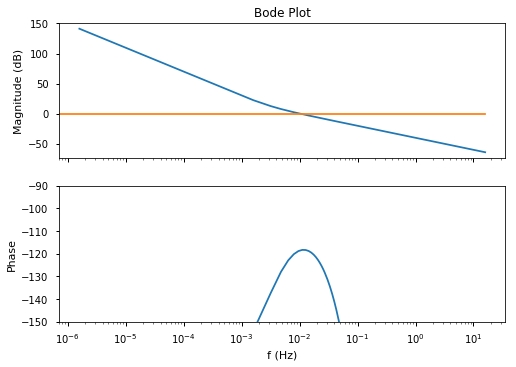

In [4]:
name = "TEK00000"
time, sig = np.loadtxt(name + ".CSV", delimiter = ',', skiprows = 1, unpack=True)
for i, t in enumerate(time):
    if t > 0:
        offset = i
        break

time = time[i:i+300]
sig = sig[i:i+300]

start_y, slope, delay = FitDelayIntegrator(time, sig, DelaySeed=1.1, SlopeSeed=-0.01, fitpoints = fitpoints)
slope = slope/kControlSetting#gives slope in process/seconds/control
MakeCharacterizationPlot(name, time, sig, delay, slope, start_y, SignalLims = None)
plt.show()
print("Delay: ", delay, "Slope: ", slope)
MakeStabilityPlot("name", kUpdateRate, delay, slope, start_y, PhaseRange)
PrintSummary(kUpdateRate, delay, slope)

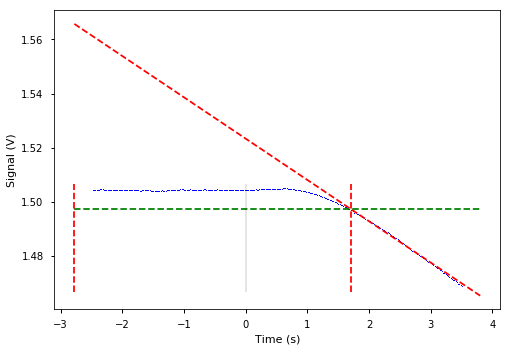

Delay:  1.706124319147161 Slope:  -0.015269483895976316
Phase Margin @ 0.02Hz: 61.5
Max Phase Margin: 61.6
Kp, Ti, Ki = -7.677, 27.3, -0.2812
1/Kp, 1/Ki = -0.13025818907875564, -3.555786626485346


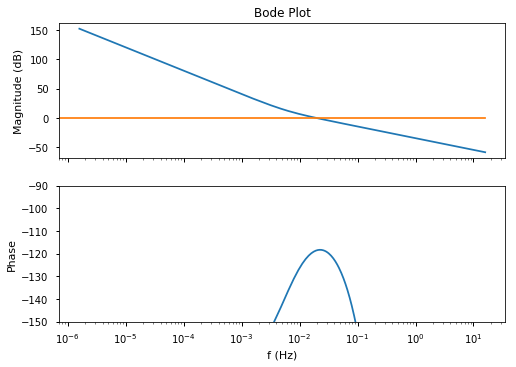

In [5]:
name = "TEK00000_10_15"
time, sig = np.loadtxt(name + ".CSV", delimiter = ',', skiprows = 1, unpack=True)
time = time[0:300]
sig = sig[0:300]

start_y, slope, delay = FitDelayIntegrator(time, sig, DelaySeed=1.1, SlopeSeed=-0.01, fitpoints = fitpoints)
slope = slope/kControlSetting#gives slope in process/seconds/control
MakeCharacterizationPlot(name, time, sig, delay, slope, start_y, SignalLims = None)
plt.show()
print("Delay: ", delay, "Slope: ", slope)
MakeStabilityPlot("name", kUpdateRate, delay, slope, start_y, PhaseRange)
PrintSummary(kUpdateRate, delay, slope)

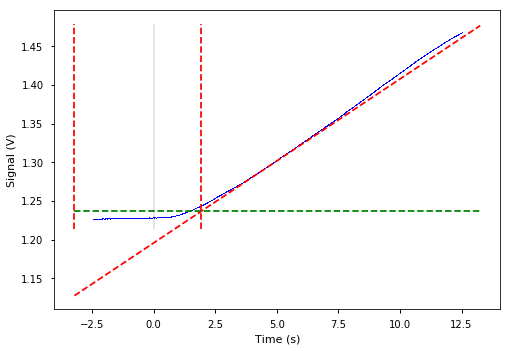

Delay:  1.9200166017886284 Slope:  0.021192163630821343
Phase Margin @ 0.018Hz: 61.5
Max Phase Margin: 61.7
Kp, Ti, Ki = 4.915, 30.72, 0.16
1/Kp, 1/Ki = 0.20344652999499077, 6.249931442666727


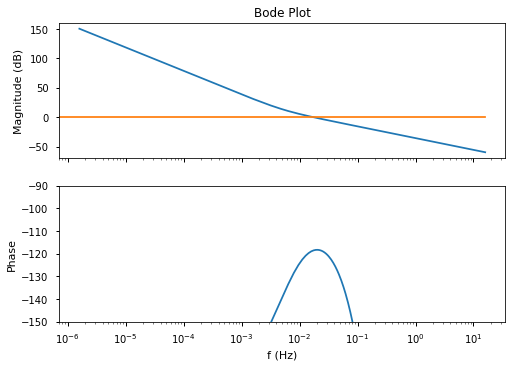

In [17]:
name = "TEK00000_10_17_bb"
time, sig = np.loadtxt(name + ".CSV", delimiter = ',', skiprows = 1, unpack=True)

plot_points = 750
time = time[0:plot_points]
sig = sig[0:plot_points]

start_y, slope, delay = FitDelayIntegrator(time, sig, DelaySeed=1.1, SlopeSeed=-0.01, fitpoints = fitpoints)
slope = slope/kControlSetting#gives slope in process/seconds/control
MakeCharacterizationPlot(name, time, sig, delay, slope, start_y, SignalLims = None)
plt.show()
print("Delay: ", delay, "Slope: ", slope)
MakeStabilityPlot("name", kUpdateRate, delay, slope, start_y, PhaseRange)
PrintSummary(kUpdateRate, delay, slope)